In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Création de l'ensemble de données
data = {
    'x': [1, 2, 3, 4, 5,6,7,8,9,10,11],
    'y': [1, 1.5, 2, 2.5, 3,3.5,4,4.5,5,5.5,6],
    'label': ['pommier', 'pommier', 'bananier','oranger','bananier','palmier', 'pommier', 'bananier','oranger','palmier','pommier']
}
# Conversion en DataFrame
df = pd.DataFrame(data)

# Affichage des données
print(df)

     x    y     label
0    1  1.0   pommier
1    2  1.5   pommier
2    3  2.0  bananier
3    4  2.5   oranger
4    5  3.0  bananier
5    6  3.5   palmier
6    7  4.0   pommier
7    8  4.5  bananier
8    9  5.0   oranger
9   10  5.5   palmier
10  11  6.0   pommier


                  Visualisation des données

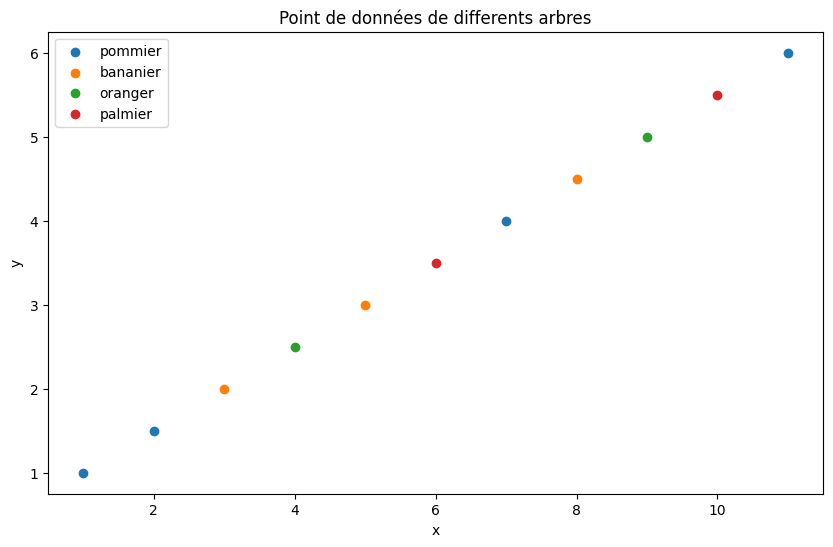

In [51]:
# Visualisation des données
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=label)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Point de données de differents arbres')
plt.show()


                        Implémentation de l'algorithme k-NN

In [52]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], x_test)
        distances.append((distance, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = [distances[i][1] for i in range(k)]
    prediction = neighbors[0]
    return prediction

# Extraction des caractéristiques et des étiquettes
X = df[['x', 'y']].values
y = df['label'].values

# Définition du nouveau point
new_point = np.array([5.5, 2])

# Prédiction avec k=1
k = 1
prediction = knn_predict(X, y, new_point, k)
print(f'Le nouveau point devrait etre : {prediction}')


Le nouveau point devrait etre : bananier


                    Visualisation du nouveau point et de son voisin le plus proche



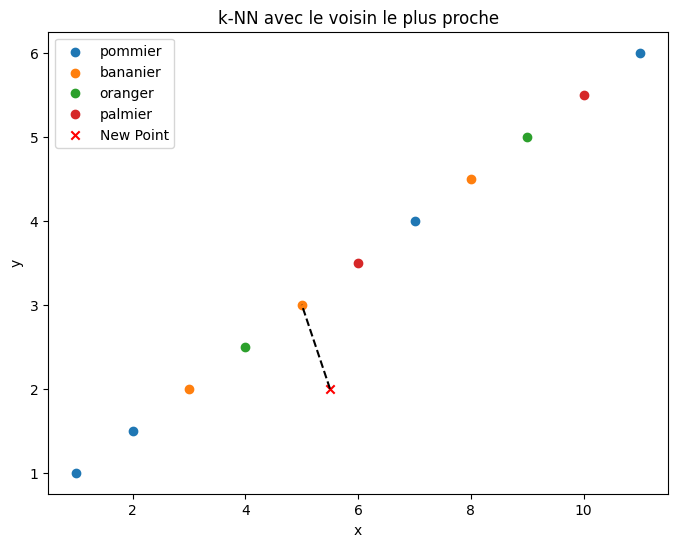

In [53]:
# Calcul des distances et tri
distances = []
for i in range(len(X)):
    distance = euclidean_distance(X[i], new_point)
    distances.append((distance, X[i], y[i]))
distances.sort(key=lambda x: x[0])

# Sélection du voisin le plus proche
nearest_neighbor = distances[0]

# Visualisation
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=label)

plt.scatter(new_point[0], new_point[1], color='red', marker='x', label='New Point')

# Tracer la ligne vers le voisin le plus proche
plt.plot([new_point[0], nearest_neighbor[1][0]], [new_point[1], nearest_neighbor[1][1]], 'k--')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('k-NN avec le voisin le plus proche')
plt.show()
